<a href="https://colab.research.google.com/github/Adarsh-Saurabh/AI-Champ-/blob/main/Making_Fire_Eyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn


In [ ]:
# !pip install matplotlib

In [ ]:
from mtcnn import MTCNN
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

%matplotlib inline

In [ ]:
image = cv2.imread('image.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)
# plt.imshow(image)

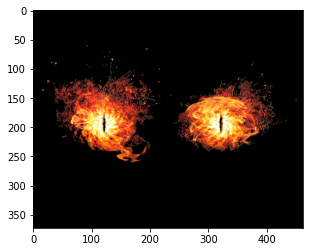

In [ ]:
filter = cv2.imread('/content/fire.png')
filter = cv2.cvtColor(filter , cv2.COLOR_BGRA2RGBA)
plt.imshow(filter)

In [ ]:
mtcnn = MTCNN()
faces = mtcnn.detect_faces(image)
faces

[{'box': [109, 125, 237, 317],
  'confidence': 0.9999815225601196,
  'keypoints': {'left_eye': (170, 257),
   'mouth_left': (180, 372),
   'mouth_right': (278, 368),
   'nose': (232, 308),
   'right_eye': (284, 256)}}]

In [ ]:
for eyes in faces:
  left_eye = eyes['keypoints']['left_eye']
  right_eye = eyes['keypoints']['right_eye']

print(left_eye , " " , right_eye)

(170, 257)   (284, 256)


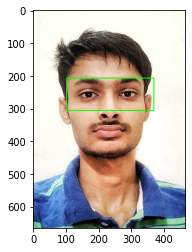

In [ ]:
x_l , y_l = left_eye
x_r , y_r = right_eye

x_l = x_l - 68
y_l = y_l - 50
x_r = x_r + 83
y_r = y_r + 50

draw_rectangle = np.copy(image)
draw_rectangle = cv2.rectangle(draw_rectangle, (x_l, y_l), (x_r, y_r), (0,255,0),2)
plt.imshow(draw_rectangle)

(99, 265, 4)


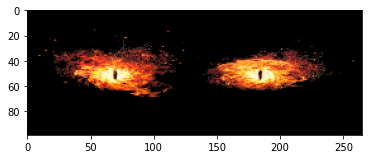

In [ ]:
height = y_r - y_l
width = x_r - x_l

filter = cv2.resize(filter , (width , height))
plt.imshow(filter)
print(filter.shape)

(99, 265, 4)
(99, 265, 3)
(99, 265, 4)
(99, 265, 4)
(665, 465, 3)


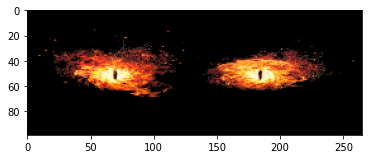

In [ ]:
alpha_filter = filter#[:,:,2]/255
alpha_background = 1 - alpha_filter

background = np.copy(image)
print(alpha_background.shape)
print(background[y_l : y_r, x_l : x_r ].shape)
print(alpha_filter.shape)
print( filter[:, :].shape)
print(background.shape)
# print(height, width)
plt.imshow(background[y_l : y_r, x_l : x_r ])
plt.imshow(alpha_filter)

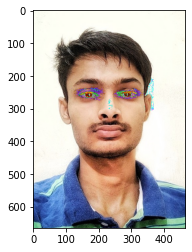

In [ ]:
alpha_background = cv2.cvtColor(alpha_background , cv2.COLOR_BGR2RGB)
# for v in range(3):
    
background[y_l : y_r, x_l : x_r ] = background[y_l : y_r, x_l : x_r ] +( alpha_background)
plt.imshow(background)
  # plt.imshow(alpha_filter)